<a href="https://colab.research.google.com/github/fAikoH-dot/TCC-v1/blob/main/arima/auto_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv("sample_data/Trigo_v1.csv", sep = ";")
df = pd.read_csv('../../data library/Milho_v1.csv', sep=";")
df["Data"] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data').reset_index(drop=True)
df["Data"] = pd.to_datetime(df['Data'])
# df.sort_values(by='Data')
# df.set_index("Data", inplace = True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
0,2004-03-01,Milho,16.9936,17.5722,1,32025.0,32500.0,34200.0,30300.0
1,2004-04-01,Milho,19.8861,19.4868,1,29975.0,32125.0,32650.0,28175.0
2,2004-05-01,Milho,19.7989,20.2459,1,26250.0,30500.0,32250.0,26000.0
3,2004-06-01,Milho,17.9299,19.0091,1,22550.0,26250.0,26425.0,22500.0
4,2004-07-01,Milho,16.4940,17.7122,1,23775.0,22550.0,24525.0,22500.0


In [9]:
!pip install python-bcb

In [3]:
from bcb import PTAX
from bcb import currency

ptax = PTAX()

df_usd = currency.get(['USD'],
                  start='2004-03-01',
                  end='2024-09-01',
                  side='ask')

df_usd["Date"]=df_usd.index
df_usd["Month"] = df_usd["Date"].dt.month
df_usd["Year"] = df_usd["Date"].dt.year
df_usd["Day"] = 1
df_usd["Aux"] = df_usd["Year"].astype(str) +"-"+ df_usd["Month"].astype(str)
df_usd = df_usd.groupby("Aux").agg(
    USD = ("USD", "mean"),
    day = ("Day", "first"),
    month = ("Month", "first"),
    year = ("Year", "first"),
).reset_index(drop=True)

df_usd["Data"] = pd.to_datetime(df_usd[['year', 'month', 'day']])
df_usd = df_usd[["Data", "USD"]].sort_values(by="Data").reset_index(drop=True)

In [4]:
# clima = pd.read_csv("sample_data/MT_dados.csv", sep=';')
clima = pd.read_csv("../../data library/Clima/MT_dados.csv", sep=';')
clima.rename(columns={"PRECIPITACAO TOTAL":"precipitacao", "TEMPERATURA MEDIA":"temperatura"}, inplace=True)

clima["precipitacao"] = clima.precipitacao.str.replace(',', '.')
clima["temperatura"] = clima.temperatura.str.replace(',', '.')

clima.bfill(inplace=True)
clima.head()

,Data Medicao,precipitacao,temperatura
0,31/03/2004,175.4,24.9
1,30/04/2004,175.4,24.5
2,31/05/2004,23,21.7
3,30/06/2004,18.8,22.1
4,31/07/2004,38,22.2


In [5]:
df["USD"] = df_usd["USD"]
df["Precipitacao"] = clima["precipitacao"].astype(float)
df["Temperatura"] = clima["temperatura"].astype(float)
df['lag_Estadual'] = df['Estadual'].shift(1)
df['lag_Estadual'] = df['lag_Estadual'].bfill()
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual
0,2004-03-01,Milho,16.9936,17.5722,1,32025.0,32500.0,34200.0,30300.0,2.905457,175.4,24.9,16.9936
1,2004-04-01,Milho,19.8861,19.4868,1,29975.0,32125.0,32650.0,28175.0,2.905985,175.4,24.5,16.9936
2,2004-05-01,Milho,19.7989,20.2459,1,26250.0,30500.0,32250.0,26000.0,3.100419,23.0,21.7,19.8861
3,2004-06-01,Milho,17.9299,19.0091,1,22550.0,26250.0,26425.0,22500.0,3.129148,18.8,22.1,19.7989
4,2004-07-01,Milho,16.4940,17.7122,1,23775.0,22550.0,24525.0,22500.0,3.036777,38.0,22.2,17.9299


In [7]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cython-3.1.0-cp313-cp313-win_amd64.whl.metadata (31 kB)
  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached cython-3.1.0-cp313-cp313-win_amd64.whl (2.7 MB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Failed to build pmdarima


  error: subprocess-exited-with-error
  
  × Building wheel for pmdarima (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      Partial import of pmdarima during the build process.
      
      Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
      Adding extra setuptools args
      Setting up with setuptools
      Traceback (most recent call last):
        File "C:\Program Files\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "C:\Program Files\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                               

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams

rcParams['figure.figsize']=15,6

from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [8]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):


    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

def plot_predictions(testing_dates, y_test, prediction):
    df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
    _, ax = plt.subplots(figsize=(10, 5))
    df_test.plot(ax=ax, label="Actual", x="date", y="actual")
    df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
    plt.legend(["Actual", "Prediction"])
    plt.show()

In [9]:
def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  print(f"R-Squared: {r2_score(y_test, prediction)}")

In [10]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

check_stationarity(train["Estadual"], name=train["Estadual"].name)

    Augmented Dickey-Fuller Test on "Estadual" 
    -----------------------------------------------
ADF Statistic: -1.151687
p-value: 0.694026
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Non-stationary


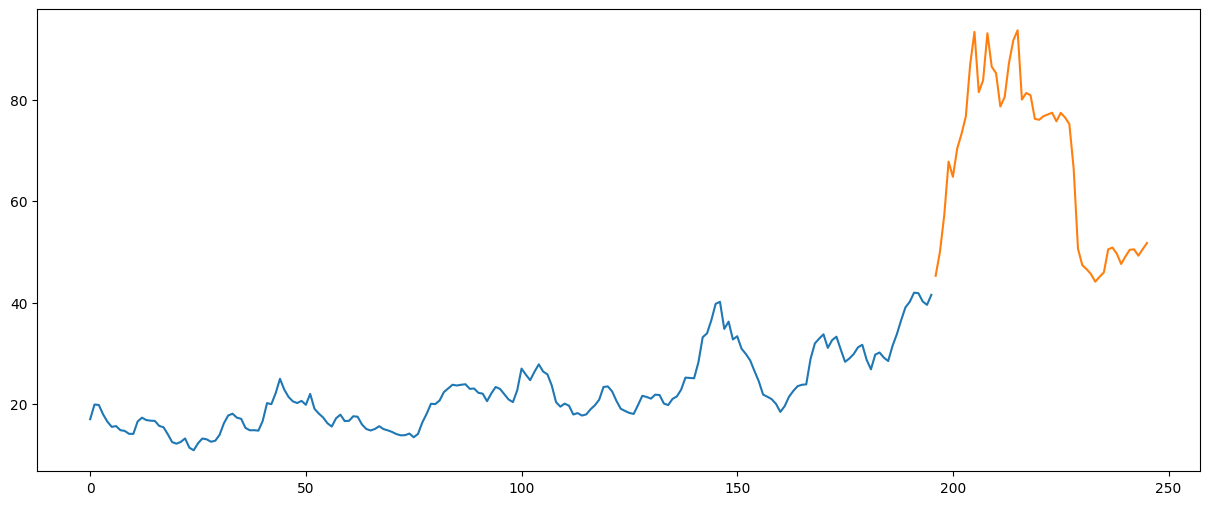

In [11]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

test_dates = test.Data

# train = train.Estadual
# test = test.Estadual

plt.plot(train.Estadual)
plt.plot(test.Estadual)

In [12]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df["Estadual"])

##Dado Não-Estacionário > I = 0

(0.30575418150042244, True)

In [71]:
train.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual
0,2004-03-01,Milho,16.9936,17.5722,1,32025.0,32500.0,34200.0,30300.0,2.905457,175.4,24.9,16.9936
1,2004-04-01,Milho,19.8861,19.4868,1,29975.0,32125.0,32650.0,28175.0,2.905985,175.4,24.5,16.9936
2,2004-05-01,Milho,19.7989,20.2459,1,26250.0,30500.0,32250.0,26000.0,3.100419,23.0,21.7,19.8861
3,2004-06-01,Milho,17.9299,19.0091,1,22550.0,26250.0,26425.0,22500.0,3.129148,18.8,22.1,19.7989
4,2004-07-01,Milho,16.4940,17.7122,1,23775.0,22550.0,24525.0,22500.0,3.036777,38.0,22.2,17.9299


# USD

In [13]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:(len(df))]

test_dates = test.Data

In [74]:
arima_model = auto_arima(train.Estadual, X = train[["USD", "País"]],start_p=0, d=0, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 0, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=12, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [75]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -182.898
Date:                Thu, 10 Apr 2025   AIC                            377.796
Time:                        00:17:13   BIC                            397.464
Sample:                             0   HQIC                           385.759
                                - 196                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4654      0.167     -2.792      0.005      -0.792      -0.139
USD            0.2002      0.266      0.752      0.452      -0.322       0.722
País           0.9957      0.025     39.523      0.000       0.946       1.045
ar.L1          0.9201      0.075     12.313      0.000       0.774       1.067
ar.L2         -0.1326      0.072     -1.852      0.064      -0.273       0.008
sigma2         0.3763      0.031     12.024      0.000       0.315       0.438
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                38.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.81   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test), X=test[["USD", "País"]]),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index

C:\Users\hamatsu\AppData\Local\Temp\ipykernel_16496\3360805911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Data"] = test.index


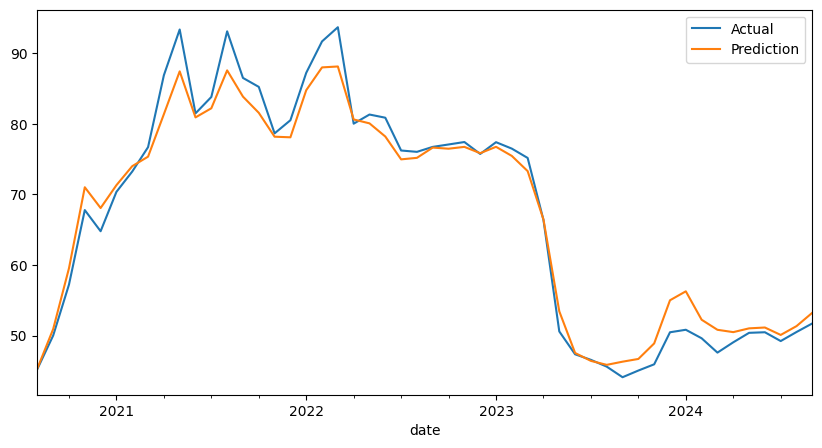

In [77]:
test["Data"] = test.index
testing_dates = test_dates

plot_predictions(testing_dates, test.Estadual, prediction.predicted_Estadual)

In [78]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual,predict_Estadual
196,196,Milho,45.2704,45.8405,1,34850.0,31500.0,35300.0,30725.0,5.280191,33.0,26.7,41.5048,45.354499
197,197,Milho,50.0149,51.5842,1,37900.0,34775.0,38275.0,34325.0,5.461233,33.0,26.7,45.2704,50.930923
198,198,Milho,57.2360,60.4194,1,39850.0,37900.0,42225.0,37725.0,5.399486,33.0,26.7,50.0149,59.550216
199,199,Milho,67.7848,72.0206,1,41975.0,39600.0,43050.0,39300.0,5.625790,33.0,26.7,57.2360,71.018120
200,200,Milho,64.7903,69.2060,1,48400.0,42000.0,48575.0,40900.0,5.417835,33.0,26.7,67.7848,68.077798


In [79]:
evaluate_model(test["Estadual"], test["predict_Estadual"])

MAE: 1.934003529131312
RMSE: 2.5403545328126182
MAPE: 0.029135687477424413
R-Squared: 0.9757050949259459


# Multiple Variables

In [138]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

test_start_date = test["Data"][:1]
test_end_date = test["Data"][-1:]

test_dates = test.Data

In [127]:
arima_model = auto_arima(train.Estadual, X = train[["USD", "País", "Último", "Máxima", "Precipitacao", "lag_Estadual"]],start_p=0, d=0, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 0, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=12, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

C:\Users\hamatsu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\hamatsu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\hamatsu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\hamatsu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\hamatsu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero e

In [128]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -213.899
Date:                Thu, 10 Apr 2025   AIC                            443.797
Time:                        11:15:17   BIC                            470.022
Sample:                             0   HQIC                           454.414
                                - 196                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
USD              0.3998      0.236      1.694      0.090      -0.063       0.862
País             0.7891      0.052     15.080      0.000       0.687       0.892
Último        6.526e-06   1.61e-05      0.405      0.685    -2.5e-05    3.81e-05
Máxima       -8.586e-06   1.67e-05     -0.513      0.608   -4.14e-05    2.42e-05
Precipitacao    -0.0007      0.001     -0.858      0.391      -0.002       0.001
lag_Estadual     0.1110      0.050      2.232      0.026       0.014       0.208
ar.L1            0.6758      0.056     12.024      0.000       0.566       0.786
sigma2           0.5201      0.071      7.317      0.000       0.381       0.659
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                27.29
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.44   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
# Import required libraries

import pandas as pd
import numpy as np

# Create dataframe using dictionary
data_aux = test.copy()

df_aux = pd.DataFrame(data_aux)

# Replace infinite updated data with nan
df_aux.replace([np.inf, -np.inf], np.nan, inplace=True)

df_aux.ffill(inplace=True)

test = df_aux.copy()

In [130]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test), X=test[["USD", "País", "Último", "Máxima", "Precipitacao", "lag_Estadual"]]),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index

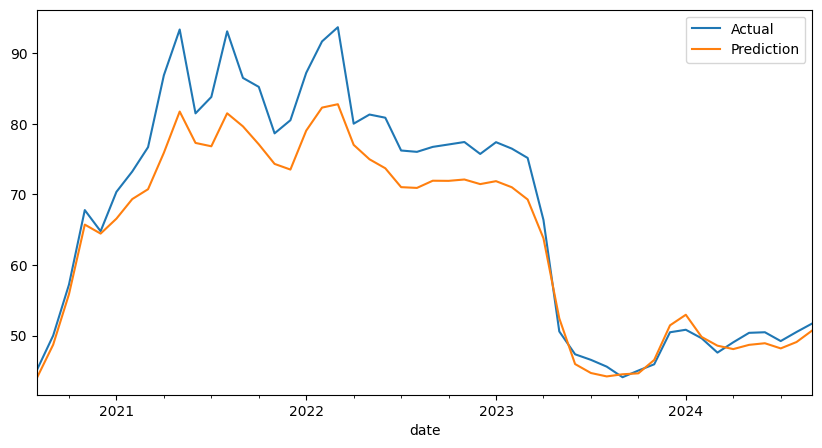

In [131]:
test["Data"] = test.index
testing_dates = test_dates

plot_predictions(testing_dates, test.Estadual, prediction.predicted_Estadual)

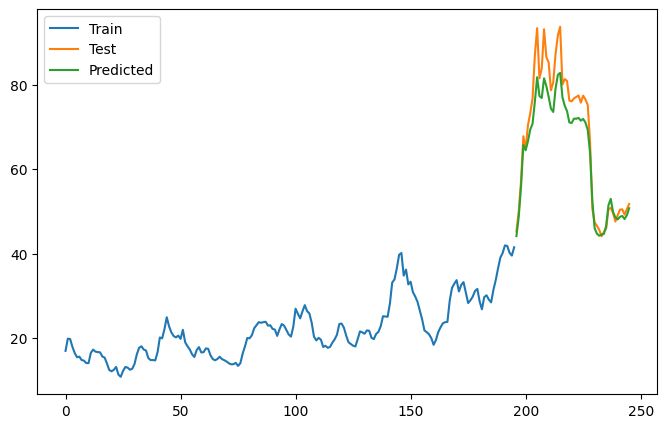

In [86]:
plt.figure(figsize=(8,5))
plt.plot(train.Estadual, label = "Train")
plt.plot(test.Estadual, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc='upper left')
plt.show()

In [143]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual,predict_Estadual
196,2020-08-01,Milho,45.2704,45.8405,1,34850.0,31500.0,35300.0,30725.0,5.280191,33.0,26.7,41.5048,44.142485
197,2020-09-01,Milho,50.0149,51.5842,1,37900.0,34775.0,38275.0,34325.0,5.461233,33.0,26.7,45.2704,48.721330
198,2020-10-01,Milho,57.2360,60.4194,1,39850.0,37900.0,42225.0,37725.0,5.399486,33.0,26.7,50.0149,55.877656
199,2020-11-01,Milho,67.7848,72.0206,1,41975.0,39600.0,43050.0,39300.0,5.625790,33.0,26.7,57.2360,65.730530
200,2020-12-01,Milho,64.7903,69.2060,1,48400.0,42000.0,48575.0,40900.0,5.417835,33.0,26.7,67.7848,64.456215


In [146]:
output_arima = pd.concat([train, test], ignore_index=True)
output_arima["model"] = "ARIMA"
output_arima.to_csv("Milho_Resultados_ARIMA.csv", index=False, sep=',')

In [43]:
evaluate_model(test["Estadual"], test["predict_Estadual"])

MAE: 4.424606110083662
RMSE: 5.47067492606383
MAPE: 0.03210967260751286
R-Squared: 0.9417311411382636


In [92]:
expanded_df = pd.read_csv("../prophet/expanded_df_milho.csv", sep=";")
expanded_df.rename(columns={"ds":"Data"}, inplace=True)

In [93]:
real_data = df[['Data', 'USD', 'País', 'Último', 'Máxima', 'lag_Estadual']].copy()
final_date = df["Data"][-1:]
predicted_data = expanded_df[['Data', 'USD', 'País', 'Último', 'Máxima', 'lag_Estadual']][len(train)+len(test):]

real_data_2 = pd.concat([real_data, predicted_data], ignore_index=True)

In [95]:
test_2 = real_data_2[['Data', 'USD', 'País', 'Último', 'Máxima', 'lag_Estadual']][train_size:].reset_index(drop=True)
test_2.head()

,Data,USD,País,Último,Máxima,lag_Estadual
0,2020-08-01 00:00:00,5.280191,45.8405,34850.0,35300.0,41.5048
1,2020-09-01 00:00:00,5.461233,51.5842,37900.0,38275.0,45.2704
2,2020-10-01 00:00:00,5.399486,60.4194,39850.0,42225.0,50.0149
3,2020-11-01 00:00:00,5.625790,72.0206,41975.0,43050.0,57.2360
4,2020-12-01 00:00:00,5.417835,69.2060,48400.0,48575.0,67.7848


In [120]:
# model_fit = arima_model.fit(y=train["Estadual"])
forecast = arima_model.predict(n_periods=len(test)+24)

In [125]:
arima_model.fit(real_data)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [123]:
forecast

196    41.447938
197    41.391154
198    41.334447
199    41.277819
200    41.221268
         ...    
265    37.706878
266    37.655219
267    37.603631
268    37.552113
269    37.500667
Length: 74, dtype: float64

In [122]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test_2), X=test_2[["USD", "País", "Último", "Máxima", "lag_Estadual"]]),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index

TypeError: DataFrame.__init__() got an unexpected keyword argument 'X'

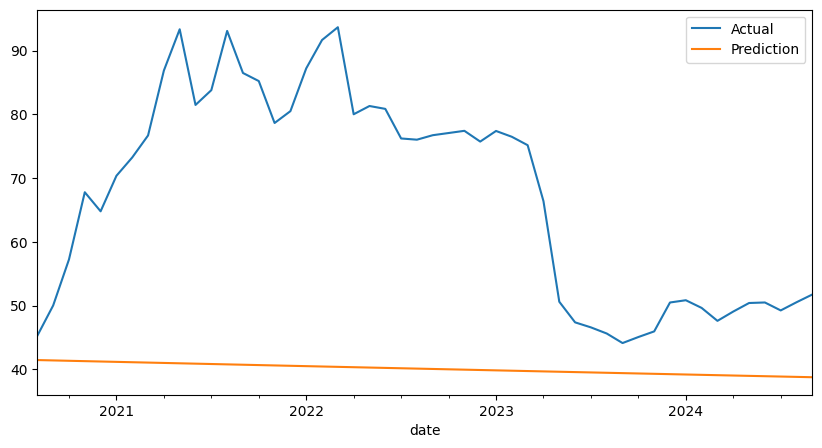

In [106]:
test["Data"] = test.index
testing_dates = test_dates

plot_predictions(testing_dates, test.Estadual, prediction.predicted_Estadual)

Não-estacionário para Estacionário


In [14]:
teste = pd.Series(df["Estadual"], name="Estadual")
teste.describe()

count    246.000000
mean      31.304886
std       20.691652
min       10.865400
25%       17.896250
50%       22.633700
75%       35.875350
max       93.681500
Name: Estadual, dtype: float64

In [15]:
df = pd.read_csv("../../data library/Milho_v1.csv", sep = ";")
df = df.sort_values(by='Data').reset_index(drop=True)
# df.set_index("Data", inplace = True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
0,2004-03-01,Milho,16.9936,17.5722,1,32025.0,32500.0,34200.0,30300.0
1,2004-04-01,Milho,19.8861,19.4868,1,29975.0,32125.0,32650.0,28175.0
2,2004-05-01,Milho,19.7989,20.2459,1,26250.0,30500.0,32250.0,26000.0
3,2004-06-01,Milho,17.9299,19.0091,1,22550.0,26250.0,26425.0,22500.0
4,2004-07-01,Milho,16.4940,17.7122,1,23775.0,22550.0,24525.0,22500.0


In [16]:
df['Data'] = pd.to_datetime(df['Data'])
df["USD"] = df_usd["USD"]
df = df.set_index('Data')
monthly_summary = df.Estadual.resample('ME').mean().ffill()

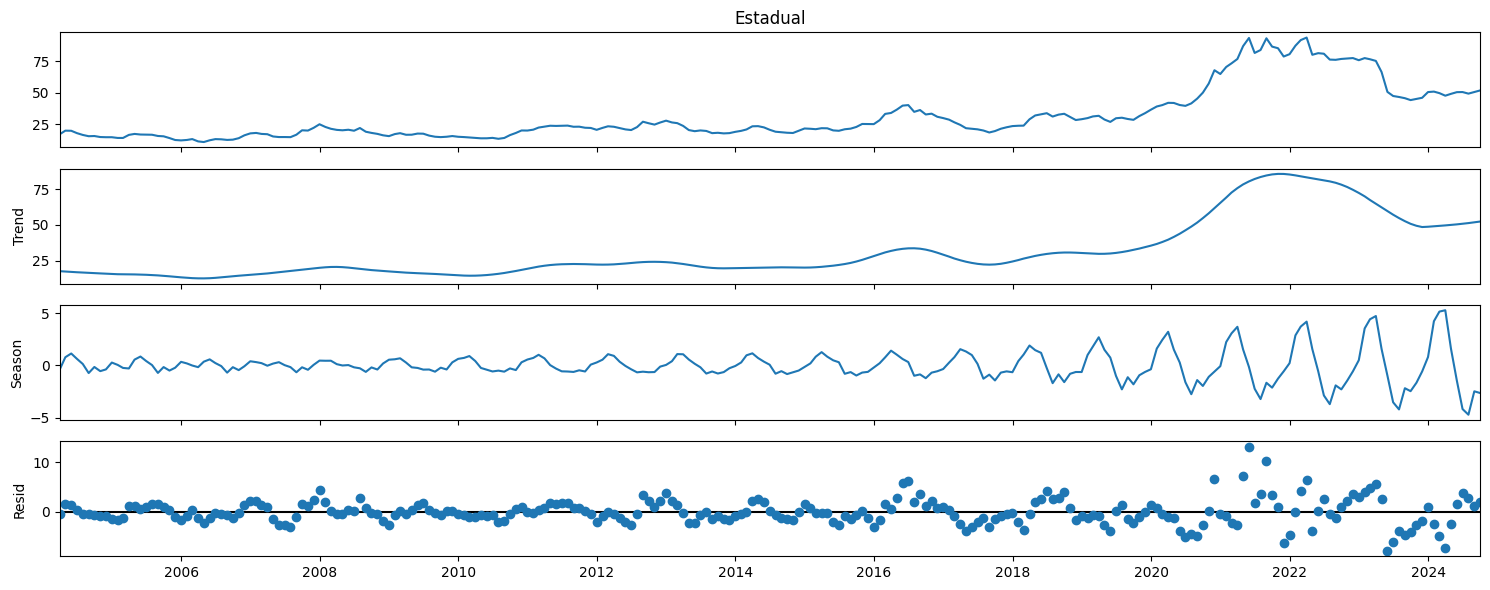

In [17]:
from statsmodels.tsa.seasonal import STL

stl = STL(monthly_summary, seasonal=13)
res = stl.fit()
fig = res.plot()

In [18]:
#Aplicanto a função Log para converter os dados para estacionários

df_log=np.sqrt(df['Estadual'])
df_diff=df_log.diff().dropna()

In [19]:
# from pmdarima.arima import ADFTest

# adf_test = ADFTest(alpha = 0.05)
# adf_test.should_diff(df_diff)

##Dado Estacionário > I = 1

check_stationarity(df_diff, name=df_diff.name)

    Augmented Dickey-Fuller Test on "Estadual" 
    -----------------------------------------------
ADF Statistic: -4.152277
p-value: 0.000793
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
Stationary


In [20]:
df["Estadual"] = df_diff
df = df.bfill()
df.head()

,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD
Data,,,,,,,,,
2004-03-01,Milho,0.337054,17.5722,1,32025.0,32500.0,34200.0,30300.0,2.905457
2004-04-01,Milho,0.337054,19.4868,1,29975.0,32125.0,32650.0,28175.0,2.905985
2004-05-01,Milho,-0.009788,20.2459,1,26250.0,30500.0,32250.0,26000.0,3.100419
2004-06-01,Milho,-0.215224,19.0091,1,22550.0,26250.0,26425.0,22500.0,3.129148
2004-07-01,Milho,-0.173091,17.7122,1,23775.0,22550.0,24525.0,22500.0,3.036777


In [21]:
train_size = int(len(df.Estadual.dropna()) * 0.75)

train, test = df[0:train_size], df[train_size:len(df)]
# train, test = df.Estadual.dropna()[0:size], df.Estadual.dropna()[size:len(df.Estadual.dropna())]
# test = test.reset_index()['Estadual']
history = [x for x in train.Estadual]
predictions = []

In [22]:
arima_model = auto_arima(train.Estadual, X = train[["USD", "País"]], start_p=0, d=1, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 1, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=13, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [23]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                             
========================================================================================================
Dep. Variable:                                                y   No. Observations:                  184
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2, 3, 4, 5], 13)   Log Likelihood                  41.513
Date:                                          Thu, 15 May 2025   AIC                            -67.025
Time:                                                  12:15:53   BIC                            -41.939
Sample:                                                       0   HQIC                           -56.846
                                                          - 184                                         
Covariance Type:                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
USD           -0.0526      0.149     -0.352      0.725      -0.345       0.240
País           0.0544      0.010      5.486      0.000       0.035       0.074
ma.S.L13      -1.0335      0.112     -9.191      0.000      -1.254      -0.813
ma.S.L26       0.2039      0.127      1.605      0.109      -0.045       0.453
ma.S.L39      -0.1490      0.134     -1.112      0.266      -0.412       0.114
ma.S.L52      -0.0098      0.137     -0.072      0.943      -0.278       0.258
ma.S.L65       0.1182      0.145      0.818      0.413      -0.165       0.402
sigma2         0.0312      0.004      8.681      0.000       0.024       0.038
===================================================================================
Ljung-Box (L1) (Q):                   3.63   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.06   Prob(JB):                         0.79
Heteroskedasticity (H):               1.77   Skew:                            -0.07
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test), X = test[["USD", "País"]]),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index
prediction

C:\Users\hamatsu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hamatsu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_Estadual
Data,
2019-08-01,0.056385
2019-09-01,-0.072381
2019-10-01,0.012162
2019-11-01,0.234181
2019-12-01,0.362387
...,...
2024-05-01,0.890746
2024-06-01,0.899645
2024-07-01,0.846898


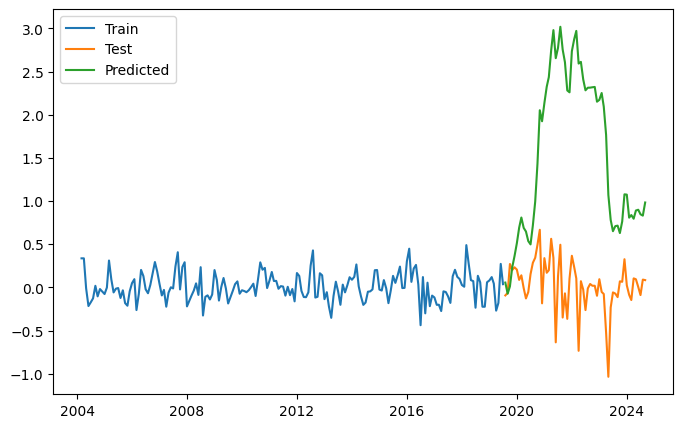

In [25]:
plt.figure(figsize=(8,5))
plt.plot(train.Estadual, label = "Train")
plt.plot(test.Estadual, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc='upper left')
plt.show()

In [26]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test

,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,predict_Estadual
Data,,,,,,,,,,
2019-08-01,Milho,-0.092387,30.8232,1,35800.0,40175.0,41700.0,35525.0,3.779339,0.056385
2019-09-01,Milho,-0.062620,30.8726,1,38800.0,35875.0,38825.0,34000.0,4.019982,-0.072381
2019-10-01,Milho,0.271652,32.7125,1,39000.0,38675.0,40250.0,37825.0,4.121500,0.012162
2019-11-01,Milho,0.201574,34.7516,1,37125.0,38925.0,39175.0,36225.0,4.086987,0.234181
2019-12-01,Milho,0.233398,37.3426,1,38775.0,37175.0,39200.0,35700.0,4.155345,0.362387
...,...,...,...,...,...,...,...,...,...,...
2024-05-01,Milho,0.095095,52.4263,1,45400.0,44675.0,48375.0,44375.0,5.129095,0.890746
2024-06-01,Milho,0.005815,52.5458,1,39725.0,44575.0,46050.0,39050.0,5.133048,0.899645
2024-07-01,Milho,-0.088357,51.4380,1,38275.0,39725.0,41200.0,38100.0,5.388975,0.846898


In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [28]:
def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  print(f"R-Squared: {r2_score(y_test, prediction)}")

In [29]:
evaluate_model(test["Estadual"], test["predict_Estadual"])

MAE: 1.5232418697017718
RMSE: 1.7945709045539722
MAPE: 22.939281055581496
R-Squared: -37.62844843899209
